In [19]:
import joblib

# Abra o arquivo .pkl no modo de leitura binária
knn_from_joblib = joblib.load('model_v-28_08.pkl')

# Agora você pode usar o modelo importado
print(knn_from_joblib)


KNeighborsClassifier(n_neighbors=6)


150303


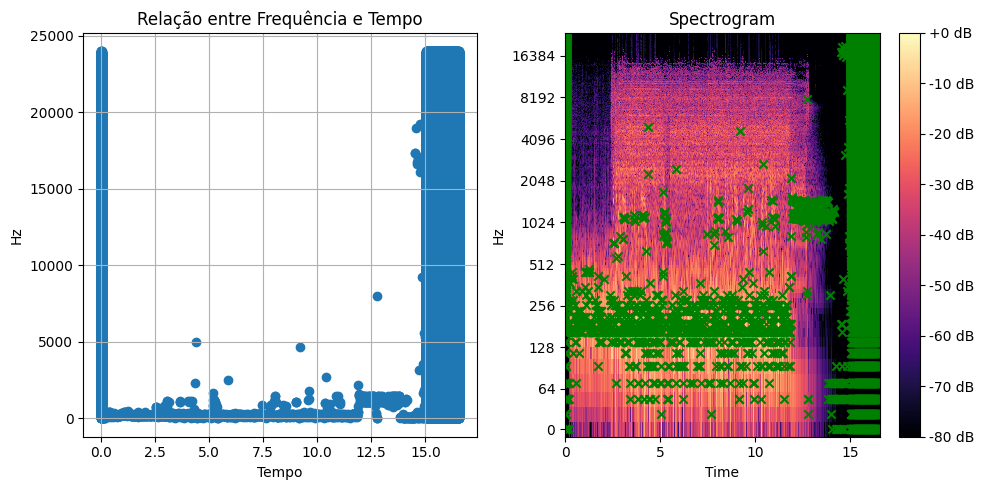

In [20]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import pandas as pd

df_hashes = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

y, sr = librosa.load('ratos.wav', sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

img = dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
fig.colorbar(img, ax=ax2, format='%+2.0f dB')
ax2.set_title('Spectrogram')

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

df_hashes.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

teste4 = pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

df_concat = pd.concat(df_hashes, ignore_index=True)
print(len(df_concat))
freq_2 = frequencies

ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
ax1.set_title('Relação entre Frequência e Tempo')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Tempo')
ax1.grid(True)

plt.tight_layout()
plt.show()

In [21]:
teste = knn_from_joblib.predict(teste4)
teste

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [22]:
cont0 = 0
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0

for i in range(len(teste)):
    if teste[i] == 5:
        cont5 +=1
    elif teste[i] == 4:
        cont4 += 1       
    elif teste[i] == 3:
        cont3 += 1
    elif teste[i] == 2:
        cont2 += 1
    elif teste[i] == 1:
        cont1 += 1
    elif teste[i] == 0:
        cont0 += 1

print(f'Frequências similares a 0: {cont0}')
print(f'Frequências similares a 1: {cont1}')
print(f'Frequências similares a 2: {cont2}')
print(f'Frequências similares a 3: {cont3}')
print(f'Frequências similares a 4: {cont4}')
print(f'Frequências similares a 5: {cont5}')

Frequências similares a 0: 0
Frequências similares a 1: 0
Frequências similares a 2: 0
Frequências similares a 3: 150303
Frequências similares a 4: 0
Frequências similares a 5: 0


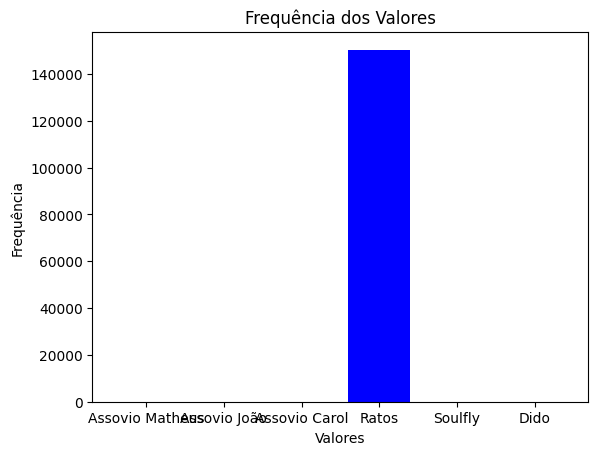

In [23]:
labels = ['Assovio Matheus', 'Assovio João', 'Assovio Carol', 'Ratos', 'Soulfly', 'Dido']
frequencies = [cont0, cont1, cont2, cont3, cont4, cont5]

plt.bar(labels, frequencies, color='blue')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores')
plt.show()